In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Min $f(x, y)=2y-x$
subject to: 

$g_1(x, y)=x^2 + 4y^2 -16 \leq 0$, 

$g_2(x,y)=(x-3)^2 + (y-3)^2-9 \leq 0$, 

$x \geq 0$

$y \geq 0$


In [4]:
f = lambda x: 2 * x[1] - x[0]
g1 = lambda x: -x[0]**2 - 4 * x[1]**2 + 16
g2 = lambda x: -(x[0] - 3)**2 - (x[1] - 3)**2 + 9

e:\a-soft\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
e:\a-soft\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


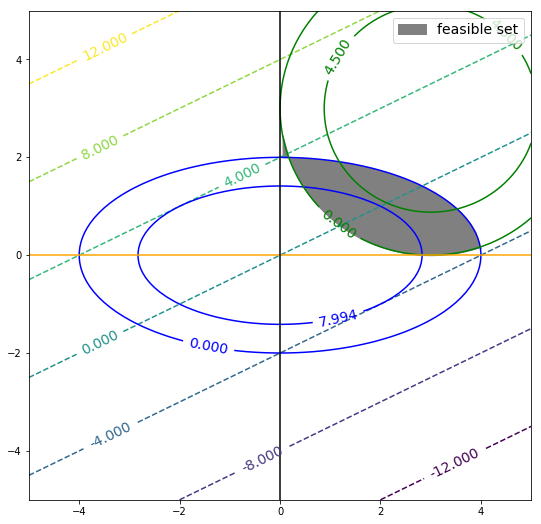

In [5]:
X0 = np.linspace(-5, 5, 100)
Y0 = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X0, Y0)
F = f([X, Y])
G1 = g1([X, Y])
G2 = g2([X, Y])

plt.figure(figsize=(9, 9))
cs = plt.contour(X, Y , F, linestyles='dashed')
plt.clabel(cs, fontsize=14)
cs1 = plt.contour(X, Y, G1, colors='blue', levels=np.linspace(0, G1.max(), 3))
plt.clabel(cs1, fontsize=14, label="$g_1$")
cs2 = plt.contour(X, Y, G2, colors="green", levels=np.linspace(0, G2.max(), 3))
plt.clabel(cs2, fontsize=14)
plt.hlines(0, -5, 5, color="orange")
plt.vlines(0, -5, 5, color="black")
plt.fill_between(X0, np.sqrt((16 - X0**2) / 4), 
                 -np.sqrt(9 - (X0 - 3)**2) + 3, 
                 color='grey', label="feasible set")
plt.legend(fontsize=14)
plt.show()

## Using `Scipy`

In [123]:
from scipy import optimize

constraints = [{"type": "ineq", "fun": g1}, 
               {"type": "ineq", "fun": g2}]
bounds = [[0, None], [0, None]]
opt = optimize.minimize(f, [0, 0], constraints=constraints, 
                        bounds=bounds, method="SLSQP")
opt

     fun: -3.652701134792328
     jac: array([-1.,  2.])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([3.98608288, 0.16669087])

e:\a-soft\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
e:\a-soft\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


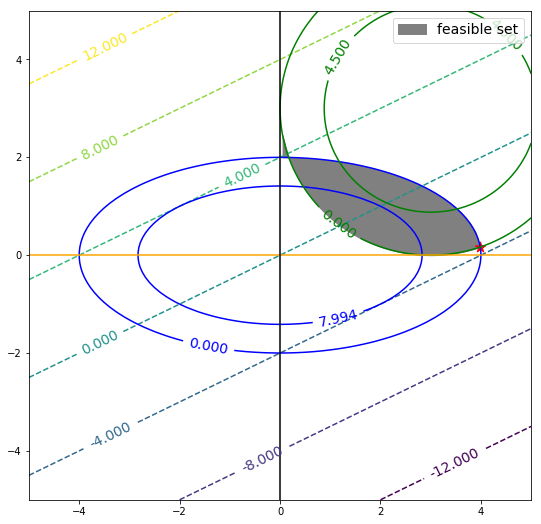

In [136]:
X0 = np.linspace(-5, 5, 100)
Y0 = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X0, Y0)
F = f([X, Y])
G1 = g1([X, Y])
G2 = g2([X, Y])

plt.figure(figsize=(9, 9))
cs = plt.contour(X, Y , F, linestyles='dashed')
plt.clabel(cs, fontsize=14)
cs1 = plt.contour(X, Y, G1, colors='blue', levels=np.linspace(0, G1.max(), 3))
plt.clabel(cs1, fontsize=14, label="$g_1$")
cs2 = plt.contour(X, Y, G2, colors="green", levels=np.linspace(0, G2.max(), 3))
plt.clabel(cs2, fontsize=14)
plt.hlines(0, -5, 5, color="orange")
plt.vlines(0, -5, 5, color="black")
plt.fill_between(X0, np.sqrt((16 - X0**2) / 4), 
                 -np.sqrt(9 - (X0 - 3)**2) + 3, 
                 color='grey', label="feasible set")
plt.scatter(opt.x[0], opt.x[1], marker="*", s=120, c="r", zorder=5, 
            label="")
plt.legend(fontsize=14)
plt.show()